Here, to compare degrees of polynomial regression, we will use Pipeline.
A Pipeline in Scikit-Learn is a way to streamline a sequence of data preprocessing and model training steps. Instead of applying transformations (like scaling, polynomial feature expansion, etc.) separately and manually, a pipeline allows us to combine them into a single workflow.


In [1]:
import numpy as np
x = 6 * np.random.rand(100, 1) - 3
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
def visualize(degree):
    poly=PolynomialFeatures(degree=degree)
    x_train_poly=poly.fit_transform(x_train)
    x_test_poly=poly.transform(x_test)
    model=LinearRegression()
    model.fit(x_train_poly,y_train)
    y_pred=model.predict(x_test_poly)
    sorted_indices = np.argsort(x_test.ravel())  

# Sort both x_test and y_pred_poly together
    x_test_sorted = x_test[sorted_indices]       
    y_pred_poly_sorted = y_pred[sorted_indices]  

# Plot scatter for training data
    plt.scatter(x_train, y_train, label="Training Data", color="blue")

# Plot sorted polynomial regression line
    plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', label="Polynomial Regression Fit")

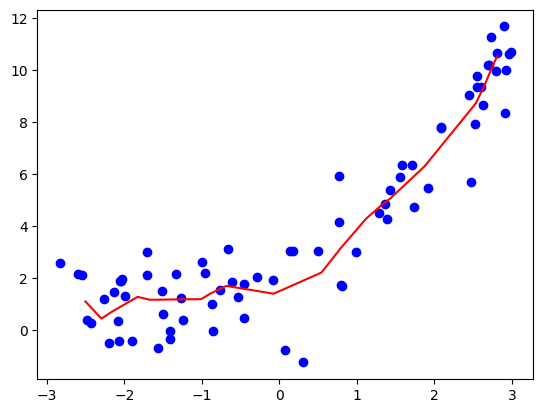

In [13]:
visualize(12)

Now we will use pipeline for the same

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

def visualize(degree):
    poly = PolynomialFeatures(degree=degree)
    model = Pipeline([
        ('poly_features', poly),
        ('linear_regression', LinearRegression())
    ])

    model.fit(x_train, y_train)

    # Sort x_test for smooth curve visualization
    x_test_sorted = np.sort(x_test, axis=0)  
    y_pred = model.predict(x_test_sorted)

    # Plot original training data
    plt.scatter(x_train, y_train, label="Training Data")

    # Plot the polynomial regression curve
    plt.plot(x_test_sorted, y_pred, color='red', label=f"Degree {degree}")

    # Labels and title
    plt.xlabel("X Dataset")
    plt.ylabel("Y Predictions")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.show()


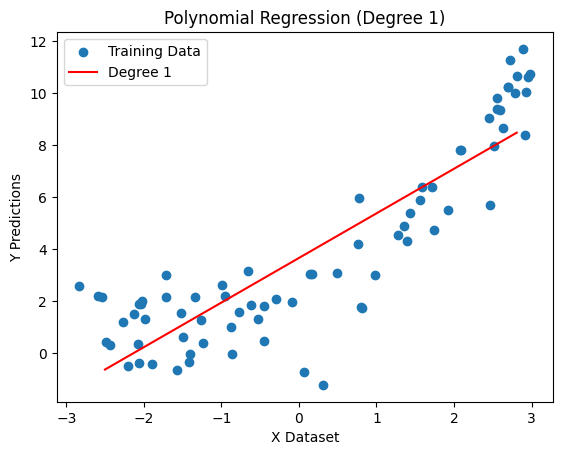

In [15]:
visualize(1)

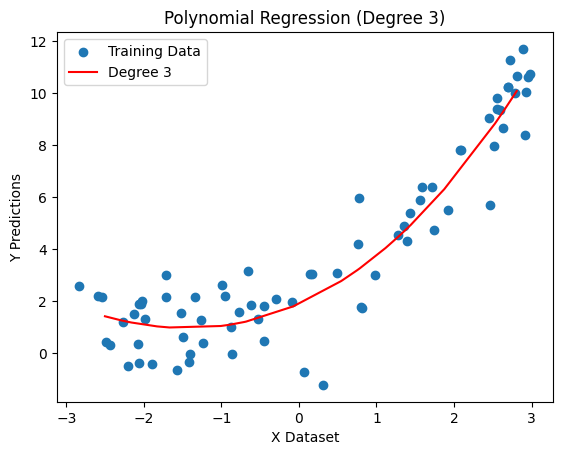

In [16]:
visualize(3)

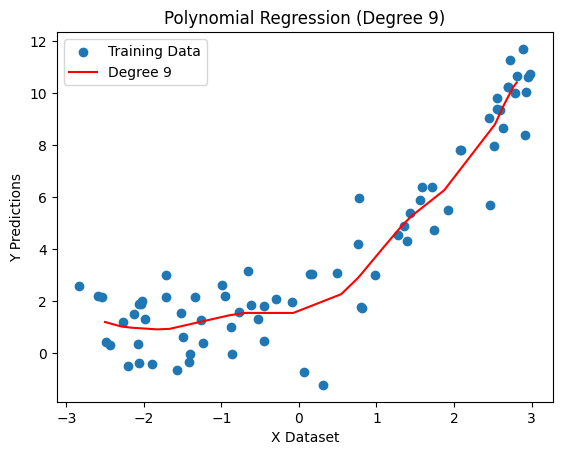

In [17]:
visualize(9)